#Create the environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [3]:
import pandas as pd
import xarray as xr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

Bins i will use to scale both the dataset

In [14]:
lon_bins = np.arange(8.5,10.05,0.1)
lon_bins

array([ 8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,
        9.6,  9.7,  9.8,  9.9, 10. ])

In [15]:
lon_labels =lon_bins[0:-1]
lon_labels

array([8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7,
       9.8, 9.9])

In [16]:
lat_bins = np.arange(44.5,46.05,0.1)
lat_bins

array([44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2, 45.3, 45.4, 45.5,
       45.6, 45.7, 45.8, 45.9, 46. ])

In [17]:
lat_labels = lat_bins[0:-1]
lat_labels

array([44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2, 45.3, 45.4, 45.5,
       45.6, 45.7, 45.8, 45.9])

#Create the COCO dataset

In [18]:
NOX_dataset = xr.open_dataset('MAY_HOURLY_2019_NOX_reduced.nc')
NOX_dataframe = NOX_dataset.to_dataframe()
NOX_dataframe.head()

crs  EMISSIONS_2019
latitude  longitude time                                           
45.949998 8.6       2019-05-01 01:00:00 -2147483647    7.495343e-12
                    2019-05-01 02:00:00 -2147483647    6.613538e-12
                    2019-05-01 03:00:00 -2147483647    6.172635e-12
                    2019-05-01 04:00:00 -2147483647    7.495343e-12
                    2019-05-01 05:00:00 -2147483647    1.322708e-11

In [19]:
NOX_dataset

<xarray.Dataset>
Dimensions:         (latitude: 15, longitude: 15, time: 720)
Coordinates:
  * longitude       (longitude) float64 8.6 8.7 8.8 8.9 9.0 ... 9.7 9.8 9.9 10.0
  * latitude        (latitude) float64 45.95 45.85 45.75 ... 44.75 44.65 44.55
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             int32 -2147483647
    EMISSIONS_2019  (time, latitude, longitude) float32 7.495e-12 ... 4.888e-12
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-04 20:59:19

I need to change the scale of the grid of the latitude and the longitude

In [20]:
NOX_dataset_latbins = NOX_dataset.groupby_bins('latitude', lat_bins, labels=lat_labels).mean()
NOX_dataset_latbins

<xarray.Dataset>
Dimensions:         (latitude_bins: 15, longitude: 15, time: 720)
Coordinates:
  * latitude_bins   (latitude_bins) float64 44.5 44.6 44.7 ... 45.7 45.8 45.9
  * longitude       (longitude) float64 8.6 8.7 8.8 8.9 9.0 ... 9.7 9.8 9.9 10.0
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             (latitude_bins) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    EMISSIONS_2019  (latitude_bins, time, longitude) float32 7.577e-12 ... 1....

In [21]:
NOX_dataset_bins=NOX_dataset_latbins.groupby_bins('longitude', lon_bins, labels=lon_labels).mean()
NOX_dataset_bins

<xarray.Dataset>
Dimensions:         (latitude_bins: 15, longitude_bins: 15, time: 720)
Coordinates:
  * longitude_bins  (longitude_bins) float64 8.5 8.6 8.7 8.8 ... 9.6 9.7 9.8 9.9
  * latitude_bins   (latitude_bins) float64 44.5 44.6 44.7 ... 45.7 45.8 45.9
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             (longitude_bins, latitude_bins) float64 -2.147e+09 ... -2...
    EMISSIONS_2019  (longitude_bins, latitude_bins, time) float32 7.577e-12 ....

In [26]:
NOX_dataset_bins = NOX_dataset_bins.rename({'longitude_bins': 'longitude','latitude_bins': 'latitude'})
NOX_dataset_bins

<xarray.Dataset>
Dimensions:         (latitude: 15, longitude: 15, time: 720)
Coordinates:
  * longitude       (longitude) float64 8.5 8.6 8.7 8.8 8.9 ... 9.6 9.7 9.8 9.9
  * latitude        (latitude) float64 44.5 44.6 44.7 44.8 ... 45.7 45.8 45.9
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables:
    crs             (longitude, latitude) float64 -2.147e+09 ... -2.147e+09
    EMISSIONS_2019  (longitude, latitude, time) float32 7.577e-12 ... 1.997e-12

#Weather - wind_vegetation_pressure_cloud

In [27]:
# Open netCDF file and convert to dataframe
wvpc_Dataset = xr.open_dataset('05_2019_wind_vegetation_pressure_cloud.nc')
wvpc_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 46.0 45.25 44.5
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    hcc        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    cvl        (time, latitude, longitude) float32 ...
    cvh        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-30 19:47:56 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Weather - hum_temp

In [29]:
hum_temp_Dataset = xr.open_dataset('05_2019_hum_temp.nc')
hum_temp_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 46.0 45.25 44.5
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-04 19:24:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

Rename the variables

In [30]:
hum_temp_Dataset['tmp'] = hum_temp_Dataset['t']
hum_temp_Dataset = hum_temp_Dataset.drop(['t'])
hum_temp_Dataset['sp_hum'] = hum_temp_Dataset['q']
hum_temp_Dataset = hum_temp_Dataset.drop(['q'])
hum_temp_Dataset['rel_hum'] = hum_temp_Dataset['r']
hum_temp_Dataset = hum_temp_Dataset.drop(['r'])
hum_temp_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 46.0 45.25 44.5
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    tmp        (time, latitude, longitude) float32 264.7 264.6 ... 268.0 268.2
    sp_hum     (time, latitude, longitude) float32 3.909e-06 ... 3.998e-06
    rel_hum    (time, latitude, longitude) float32 0.0002077 ... 0.0001586
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-04 19:24:09 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Weather - water

In [31]:
water_Dataset = xr.open_dataset('05_2019_water.nc')
water_Dataset

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 46.0 45.25 44.5
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables:
    tcwv       (time, latitude, longitude) float32 ...
    tcw        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-04 19:24:11 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

#Put weather togheter

In [32]:
weather_dataset = wvpc_Dataset.merge(hum_temp_Dataset)
weather_dataset = weather_dataset.merge(water_Dataset)
weather_dataset

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 46.0 45.25 44.5
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T09:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 0.5731 -0.4543 ... -0.7733
    v10        (time, latitude, longitude) float32 -1.093 -1.181 ... -0.9356
    hcc        (time, latitude, longitude) float32 -2.98e-08 0.005875 ... 0.4935
    lcc        (time, latitude, longitude) float32 0.06919 0.1417 ... 0.06789
    tcc        (time, latitude, longitude) float32 0.06919 0.1593 ... 0.5429
    cvl        (time, latitude, longitude) float32 0.2587 0.4586 ... 0.3537
    ...         ...
    sp         (time, latitude, longitude) float32 8.849e+04 ... 9.705e+04
    tmp        (time, latitude, longitude) float32 264.7 264.6 ... 268.0 268.2
    sp_hum     (time, latitude, longitude) float32 3.909e-06 ... 3.998e-06
    rel_hum    (time, latitude, longitude) float32 0.0002077 ... 0.0001586
    tcwv       (time, latitude, longitude) float32 8.003 9.206 ... 14.71 14.64
    tcw        (time, latitude, longitude) float32 8.011 9.239 ... 14.71 14.65
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-30 19:47:56 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [33]:
weather_dataset.sortby(['latitude','longitude','time'])  

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 44.5 45.25 46.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 1.648 0.716 ... -0.3962
    v10        (time, latitude, longitude) float32 1.923 1.894 ... -0.574 -0.738
    hcc        (time, latitude, longitude) float32 -2.98e-08 ... -2.98e-08
    lcc        (time, latitude, longitude) float32 0.0 0.0 ... 0.08802 0.4925
    tcc        (time, latitude, longitude) float32 0.02145 0.2537 ... 0.5207
    cvl        (time, latitude, longitude) float32 0.2334 0.05303 ... 0.4586
    ...         ...
    sp         (time, latitude, longitude) float32 9.804e+04 ... 8.93e+04
    tmp        (time, latitude, longitude) float32 264.3 264.3 ... 271.1 271.2
    sp_hum     (time, latitude, longitude) float32 3.904e-06 ... 4.015e-06
    rel_hum    (time, latitude, longitude) float32 0.0002142 ... 0.000123
    tcwv       (time, latitude, longitude) float32 12.84 13.31 ... 18.74 17.41
    tcw        (time, latitude, longitude) float32 12.84 13.34 ... 18.75 17.43
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-30 19:47:56 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [35]:
weather_Dataframe = weather_dataset.to_dataframe()
weather_Dataframe.head()

u10       v10  ...      tcwv       tcw
latitude longitude time                                     ...                    
46.0     8.5       2019-05-01 00:00:00  0.573106 -1.092710  ...  8.003064  8.011362
                   2019-05-01 12:00:00  0.361295  0.176551  ...  7.272807  7.276116
                   2019-05-01 18:00:00  0.079598  0.517412  ...  8.369429  8.368969
                   2019-05-01 03:00:00  0.612354 -1.145522  ...  7.802779  7.819559
                   2019-05-01 15:00:00  0.353319  0.605873  ...  8.104855  8.109395

[5 rows x 13 columns]

In this dataset i have to add all the missing time. We want an hourly dataset

In [36]:
def _resample(df):
   return df.set_index('time').resample('H').interpolate(method='linear')

# Group the original DataFrame by companies and apply the resampling to each.
weather_Dataframe_sampled = weather_Dataframe.reset_index(level='time').groupby(level=['latitude','longitude']).apply(_resample)

In [37]:
weather_Dataframe_sampled.head(10)

u10       v10  ...      tcwv       tcw
latitude longitude time                                     ...                    
46.0     8.5       2019-05-01 00:00:00  0.573106 -1.092710  ...  8.003064  8.011362
                   2019-05-01 01:00:00  0.586189 -1.110314  ...  7.936303  7.947428
                   2019-05-01 02:00:00  0.599271 -1.127918  ...  7.869541  7.883493
                   2019-05-01 03:00:00  0.612354 -1.145522  ...  7.802779  7.819559
                   2019-05-01 04:00:00  0.676754 -1.319216  ...  7.845639  7.861898
                   2019-05-01 05:00:00  0.741154 -1.492911  ...  7.888498  7.904236
                   2019-05-01 06:00:00  0.805554 -1.666605  ...  7.931357  7.946575
                   2019-05-01 07:00:00  0.507989 -1.179117  ...  7.959243  7.971723
                   2019-05-01 08:00:00  0.210424 -0.691628  ...  7.987129  7.996870
                   2019-05-01 09:00:00 -0.087141 -0.204139  ...  8.015015  8.022017

[10 rows x 13 columns]

In [43]:
weather_Dataset_sampled = weather_Dataframe_sampled.to_xarray()
weather_Dataset_sampled

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 742)
Coordinates:
  * latitude   (latitude) float64 46.0 45.25 44.5
  * longitude  (longitude) float64 8.5 9.25 10.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/13)
    u10        (latitude, longitude, time) float32 0.5731 0.5862 ... -1.125
    v10        (latitude, longitude, time) float32 -1.093 -1.11 ... 0.1632 0.236
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0
    tcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0338
    cvl        (latitude, longitude, time) float32 0.2587 0.2587 ... 0.3537
    ...         ...
    sp         (latitude, longitude, time) float32 8.849e+04 ... 9.687e+04
    tmp        (latitude, longitude, time) float32 264.7 264.3 ... 271.3 271.2
    sp_hum     (latitude, longitude, time) float32 3.909e-06 ... 4.009e-06
    rel_hum    (latitude, longitude, time) float32 0.0002077 ... 0.0001229
    tcwv       (latitude, longitude, time) float32 8.003 7.936 ... 17.88 18.19
    tcw        (latitude, longitude, time) float32 8.011 7.947 ... 17.88 18.19

I want to add a new feature: is the sum of the two direction wind

In [44]:
weather_Dataset_sampled['tot_wind']= np.sqrt(np.square(weather_Dataset_sampled['u10']) + np.square(weather_Dataset_sampled['v10']))
weather_Dataset_sampled

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 742)
Coordinates:
  * latitude   (latitude) float64 46.0 45.25 44.5
  * longitude  (longitude) float64 8.5 9.25 10.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/14)
    u10        (latitude, longitude, time) float32 0.5731 0.5862 ... -1.125
    v10        (latitude, longitude, time) float32 -1.093 -1.11 ... 0.1632 0.236
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0
    tcc        (latitude, longitude, time) float32 0.06919 0.1524 ... 0.0338
    cvl        (latitude, longitude, time) float32 0.2587 0.2587 ... 0.3537
    ...         ...
    tmp        (latitude, longitude, time) float32 264.7 264.3 ... 271.3 271.2
    sp_hum     (latitude, longitude, time) float32 3.909e-06 ... 4.009e-06
    rel_hum    (latitude, longitude, time) float32 0.0002077 ... 0.0001229
    tcwv       (latitude, longitude, time) float32 8.003 7.936 ... 17.88 18.19
    tcw        (latitude, longitude, time) float32 8.011 7.947 ... 17.88 18.19
    tot_wind   (latitude, longitude, time) float32 1.234 1.256 ... 0.7084 1.149

In [45]:
weather_dataset.sortby(['latitude','longitude','time'])  

<xarray.Dataset>
Dimensions:    (latitude: 3, longitude: 3, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.5 9.25 10.0
  * latitude   (latitude) float32 44.5 45.25 46.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 1.648 0.716 ... -0.3962
    v10        (time, latitude, longitude) float32 1.923 1.894 ... -0.574 -0.738
    hcc        (time, latitude, longitude) float32 -2.98e-08 ... -2.98e-08
    lcc        (time, latitude, longitude) float32 0.0 0.0 ... 0.08802 0.4925
    tcc        (time, latitude, longitude) float32 0.02145 0.2537 ... 0.5207
    cvl        (time, latitude, longitude) float32 0.2334 0.05303 ... 0.4586
    ...         ...
    sp         (time, latitude, longitude) float32 9.804e+04 ... 8.93e+04
    tmp        (time, latitude, longitude) float32 264.3 264.3 ... 271.1 271.2
    sp_hum     (time, latitude, longitude) float32 3.904e-06 ... 4.015e-06
    rel_hum    (time, latitude, longitude) float32 0.0002142 ... 0.000123
    tcwv       (time, latitude, longitude) float32 12.84 13.31 ... 18.74 17.41
    tcw        (time, latitude, longitude) float32 12.84 13.34 ... 18.75 17.43
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-30 19:47:56 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

This dataset has a 0.75 degrees grid but we want a 0.1 degrees grid. 


In [46]:
weather_Dataset_lat = weather_Dataset_sampled.reindex(latitude=lat_bins[0:-1], method="pad")
weather_Dataset_lat

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 3, time: 742)
Coordinates:
  * latitude   (latitude) float64 44.5 44.6 44.7 44.8 ... 45.6 45.7 45.8 45.9
  * longitude  (longitude) float64 8.5 9.25 10.0
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/14)
    u10        (latitude, longitude, time) float32 1.648 1.34 ... -0.3962
    v10        (latitude, longitude, time) float32 1.923 1.927 ... -0.738
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.0 0.004522 ... 0.4925
    tcc        (latitude, longitude, time) float32 0.02145 0.03759 ... 0.5207
    cvl        (latitude, longitude, time) float32 0.2334 0.2334 ... 0.4586
    ...         ...
    tmp        (latitude, longitude, time) float32 264.3 264.0 ... 271.4 271.2
    sp_hum     (latitude, longitude, time) float32 3.904e-06 ... 4.015e-06
    rel_hum    (latitude, longitude, time) float32 0.0002142 ... 0.000123
    tcwv       (latitude, longitude, time) float32 12.84 13.0 ... 17.19 17.41
    tcw        (latitude, longitude, time) float32 12.84 13.01 ... 17.22 17.43
    tot_wind   (latitude, longitude, time) float32 2.533 2.347 ... 0.6518 0.8376

In [47]:
weather_Dataset_newdegree = weather_Dataset_lat.reindex(longitude=lon_bins[0:-1], method="pad")
weather_Dataset_newdegree

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 15, time: 742)
Coordinates:
  * longitude  (longitude) float64 8.5 8.6 8.7 8.8 8.9 ... 9.5 9.6 9.7 9.8 9.9
  * latitude   (latitude) float64 44.5 44.6 44.7 44.8 ... 45.6 45.7 45.8 45.9
  * time       (time) datetime64[ns] 2019-05-01 ... 2019-05-31T21:00:00
Data variables: (12/14)
    u10        (latitude, longitude, time) float32 1.648 1.34 ... -0.2387 -0.403
    v10        (latitude, longitude, time) float32 1.923 1.927 ... -0.574
    hcc        (latitude, longitude, time) float32 -2.98e-08 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.0 0.004522 ... 0.08802
    tcc        (latitude, longitude, time) float32 0.02145 0.03759 ... 0.1188
    cvl        (latitude, longitude, time) float32 0.2334 0.2334 ... 0.4586
    ...         ...
    tmp        (latitude, longitude, time) float32 264.3 264.0 ... 271.3 271.1
    sp_hum     (latitude, longitude, time) float32 3.904e-06 ... 4.015e-06
    rel_hum    (latitude, longitude, time) float32 0.0002142 ... 0.0001237
    tcwv       (latitude, longitude, time) float32 12.84 13.0 ... 18.6 18.74
    tcw        (latitude, longitude, time) float32 12.84 13.01 ... 18.61 18.75
    tot_wind   (latitude, longitude, time) float32 2.533 2.347 ... 0.3487 0.7014

We have to remove some times to get a dataset with the same dimentions of the NOX dataset

In [48]:
remove = weather_Dataset_newdegree.time.values[weather_Dataset_newdegree.time.values>np.datetime64("2019-05-31T00:00:00.000000000")]
remove=np.append(remove, weather_Dataset_newdegree.time.values[0])
weather_dataset_final = weather_Dataset_newdegree.drop_sel(time=remove)
weather_dataset_final

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 15, time: 720)
Coordinates:
  * longitude  (longitude) float64 8.5 8.6 8.7 8.8 8.9 ... 9.5 9.6 9.7 9.8 9.9
  * latitude   (latitude) float64 44.5 44.6 44.7 44.8 ... 45.6 45.7 45.8 45.9
  * time       (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables: (12/14)
    u10        (latitude, longitude, time) float32 1.34 1.032 ... -0.3164
    v10        (latitude, longitude, time) float32 1.927 1.932 ... -1.197 -1.467
    hcc        (latitude, longitude, time) float32 0.003006 ... -2.98e-08
    lcc        (latitude, longitude, time) float32 0.004522 0.009044 ... 0.07041
    tcc        (latitude, longitude, time) float32 0.03759 0.05373 ... 0.07041
    cvl        (latitude, longitude, time) float32 0.2334 0.2334 ... 0.4586
    ...         ...
    tmp        (latitude, longitude, time) float32 264.0 263.6 ... 269.6 268.2
    sp_hum     (latitude, longitude, time) float32 3.909e-06 ... 3.985e-06
    rel_hum    (latitude, longitude, time) float32 0.0002208 ... 0.0001527
    tcwv       (latitude, longitude, time) float32 13.0 13.17 ... 11.52 11.33
    tcw        (latitude, longitude, time) float32 13.01 13.17 ... 11.52 11.33
    tot_wind   (latitude, longitude, time) float32 2.347 2.19 ... 1.268 1.501


#Togheter COCO_weather

In [49]:
 dataset_togheter = NOX_dataset_bins.merge(weather_dataset_final)
 dataset_togheter = dataset_togheter.drop_vars('crs')
 dataset_togheter

<xarray.Dataset>
Dimensions:         (latitude: 15, longitude: 15, time: 720)
Coordinates:
  * latitude        (latitude) float64 44.5 44.6 44.7 44.8 ... 45.7 45.8 45.9
  * longitude       (longitude) float64 8.5 8.6 8.7 8.8 8.9 ... 9.6 9.7 9.8 9.9
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
Data variables: (12/15)
    EMISSIONS_2019  (longitude, latitude, time) float32 7.577e-12 ... 1.997e-12
    u10             (latitude, longitude, time) float32 1.34 1.032 ... -0.3164
    v10             (latitude, longitude, time) float32 1.927 1.932 ... -1.467
    hcc             (latitude, longitude, time) float32 0.003006 ... -2.98e-08
    lcc             (latitude, longitude, time) float32 0.004522 ... 0.07041
    tcc             (latitude, longitude, time) float32 0.03759 ... 0.07041
    ...              ...
    tmp             (latitude, longitude, time) float32 264.0 263.6 ... 268.2
    sp_hum          (latitude, longitude, time) float32 3.909e-06 ... 3.985e-06
    rel_hum         (latitude, longitude, time) float32 0.0002208 ... 0.0001527
    tcwv            (latitude, longitude, time) float32 13.0 13.17 ... 11.33
    tcw             (latitude, longitude, time) float32 13.01 13.17 ... 11.33
    tot_wind        (latitude, longitude, time) float32 2.347 2.19 ... 1.501

In [50]:
dataframe_togheter = dataset_togheter.to_dataframe()
dataframe_togheter.head()

EMISSIONS_2019       u10  ...        tcw  tot_wind
         time                                           ...                     
44.5 8.5 2019-05-01 01:00:00    7.577436e-12  1.339997  ...  13.007624  2.347464
         2019-05-01 02:00:00    6.685973e-12  1.031502  ...  13.174706  2.190295
         2019-05-01 03:00:00    6.240242e-12  0.723007  ...  13.341787  2.067507
         2019-05-01 04:00:00    7.577436e-12  0.530820  ...  13.569394  1.826205
         2019-05-01 05:00:00    1.337195e-11  0.338633  ...  13.797001  1.594127

[5 rows x 15 columns]

In [52]:
 dataframe_togheter.describe()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
count,1.620000e+05,162000.000000,162000.000000,1.620000e+05,162000.000000,1.620000e+05,162000.000000,162000.000000,162000.000000,162000.000000,1.620000e+05,162000.000000,162000.000000,162000.000000,162000.000000
mean,7.991630e-11,0.135665,-0.429320,4.981452e-01,0.207615,6.873692e-01,0.532133,0.441951,94660.695312,268.389618,3.979000e-06,0.000159,16.294062,16.530701,1.592451
std,1.491551e-10,0.963696,1.509383,4.058163e-01,0.254283,3.344557e-01,0.236729,0.213191,5603.868652,2.785050,2.818790e-08,0.000039,5.560948,5.646597,0.934735
min,1.008866e-14,-4.315256,-8.589445,-2.980232e-08,0.000000,-2.980232e-08,0.053026,0.201324,87194.710938,260.780121,3.908964e-06,0.000092,4.725975,4.725986,0.005371
25%,1.178719e-11,-0.386690,-1.328532,4.891204e-02,0.014776,4.286726e-01,0.258694,0.257587,88788.234375,266.385925,3.957728e-06,0.000131,12.234460,12.436903,0.917324
50%,3.276490e-11,0.230385,-0.490867,4.753513e-01,0.103460,8.209360e-01,0.458567,0.523799,97196.855469,268.605408,3.986327e-06,0.000151,15.766780,16.047493,1.454682
75%,8.721647e-11,0.751662,0.614968,9.508705e-01,0.297872,9.875301e-01,0.742409,0.690305,100217.476562,270.421295,4.001018e-06,0.000181,20.098043,20.363066,2.079756
max,3.196351e-09,3.421348,5.831230,1.000006e+00,0.999503,1.000007e+00,0.787605,0.849091,101759.203125,274.935577,4.032162e-06,0.000307,31.597525,32.658081,8.594162


In [53]:
scaler = MinMaxScaler()

dataframe_norm =  pd.DataFrame(scaler.fit_transform(dataframe_togheter), columns=dataframe_togheter.columns)
dataframe_norm.head()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
0,0.002368,0.730974,0.729292,0.003006,0.004524,0.037594,0.245556,0.707247,0.743663,0.225018,0.000000,0.599868,0.308080,0.296492,0.272692
1,0.002089,0.691099,0.729622,0.006012,0.009048,0.053734,0.245556,0.707247,0.742809,0.198126,0.041718,0.630598,0.314296,0.302474,0.254393
2,0.001949,0.651224,0.729953,0.009018,0.013573,0.069873,0.245556,0.707247,0.741955,0.171230,0.083431,0.661328,0.320512,0.308455,0.240096
3,0.002368,0.626383,0.716804,0.006012,0.313343,0.351599,0.245556,0.707247,0.744095,0.117928,0.082535,0.756287,0.328825,0.316604,0.212001
4,0.004180,0.601542,0.703656,0.003006,0.613114,0.633325,0.245556,0.707247,0.746235,0.064629,0.081642,0.851245,0.337137,0.324752,0.184980


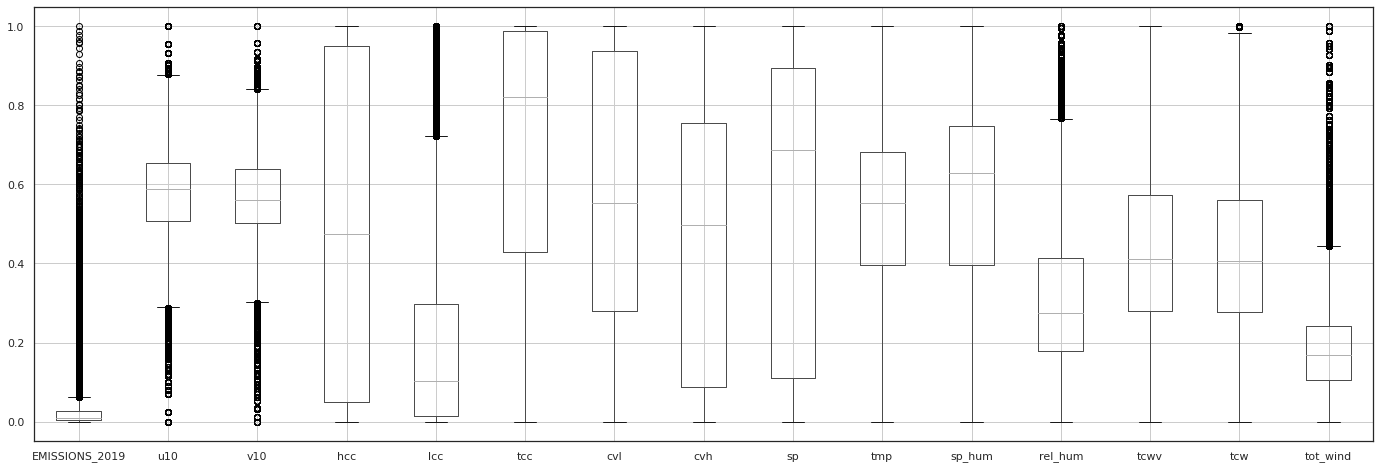

In [57]:
dataframe_norm.boxplot(figsize=(24,8));

(15.5, -0.5)

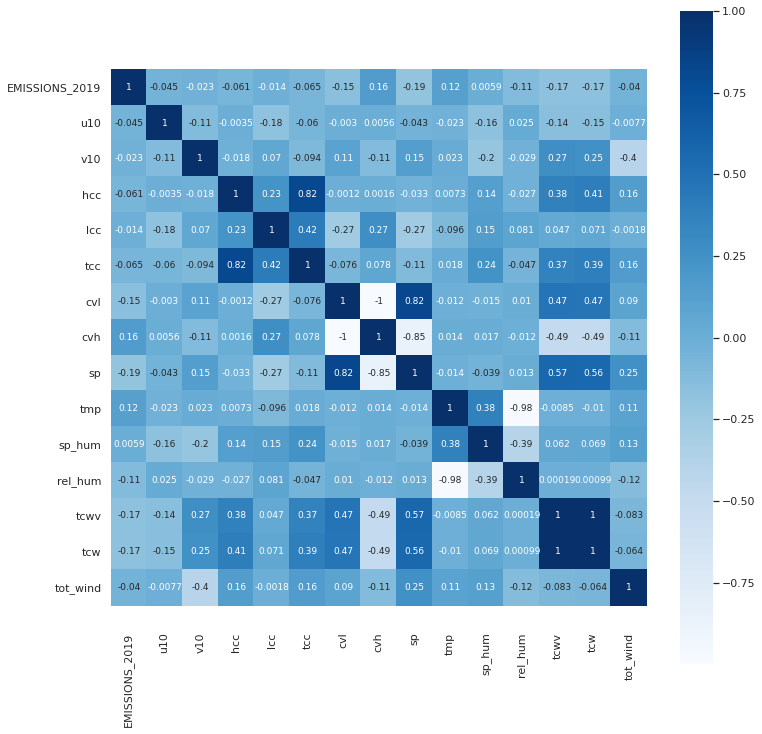

In [73]:
plt.figure(figsize=(12, 12));
cov=dataframe_norm.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 9});
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

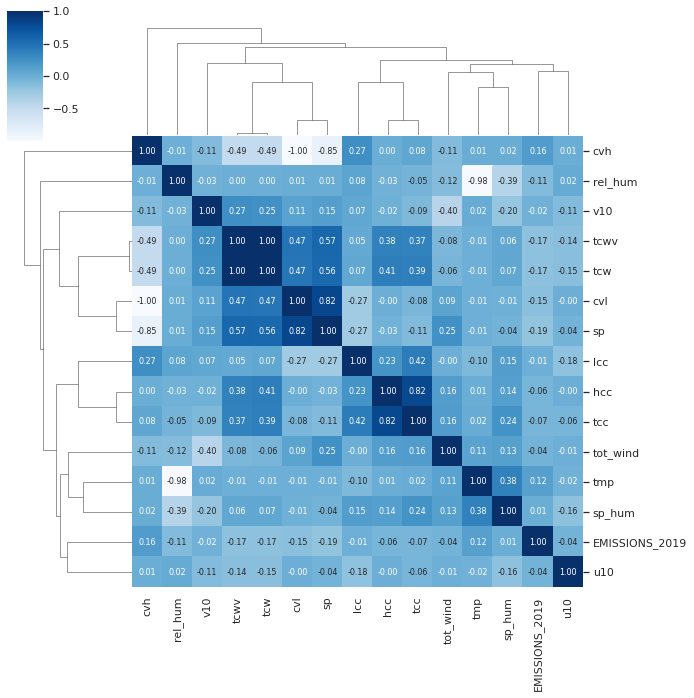

In [64]:
plt.figure(figsize=(15, 15));
sns.clustermap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');  

#Time series with fixed lat-lon

In [99]:
df_fix = dataframe_togheter.reset_index()
df_fix = df_fix[df_fix.level_0==44.70]
df_fix = df_fix[df_fix.level_1==8.70]
df_fix.head()

,level_0,level_1,time,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
23040,44.7,8.7,2019-05-01 01:00:00,2.077856e-11,1.913056,-0.315045,0.002889,0.002894,0.026765,0.787605,0.201324,100193.968750,264.131866,0.000004,0.000218,13.044115,13.046412,1.938823
23041,44.7,8.7,2019-05-01 02:00:00,1.833403e-11,1.730702,-0.466001,0.005778,0.005117,0.052859,0.787605,0.201324,100189.335938,263.737030,0.000004,0.000225,13.198793,13.202411,1.792341
23042,44.7,8.7,2019-05-01 03:00:00,1.711176e-11,1.548347,-0.616957,0.008667,0.007340,0.078953,0.787605,0.201324,100184.710938,263.342224,0.000004,0.000232,13.353472,13.358411,1.666738
23043,44.7,8.7,2019-05-01 04:00:00,2.077856e-11,1.316786,-0.746201,0.005778,0.011206,0.101843,0.787605,0.201324,100228.242188,262.652313,0.000004,0.000250,13.621343,13.631624,1.513520
23044,44.7,8.7,2019-05-01 05:00:00,3.666805e-11,1.085225,-0.875445,0.002889,0.015071,0.124732,0.787605,0.201324,100271.781250,261.962433,0.000004,0.000268,13.889213,13.904837,1.394316


In [115]:
df_fix_notall = df_fix[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc','sp','tmp','sp_hum','rel_hum','tcwv','tcw']]
df_fix_notall=df_fix_notall.set_index('time')
df_fix_notall.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcwv,tcw
time,,,,,,,,,,,,,
2019-05-01 01:00:00,2.077856e-11,1.913056,-0.315045,1.938823,0.002889,0.002894,0.026765,100193.968750,264.131866,0.000004,0.000218,13.044115,13.046412
2019-05-01 02:00:00,1.833403e-11,1.730702,-0.466001,1.792341,0.005778,0.005117,0.052859,100189.335938,263.737030,0.000004,0.000225,13.198793,13.202411
2019-05-01 03:00:00,1.711176e-11,1.548347,-0.616957,1.666738,0.008667,0.007340,0.078953,100184.710938,263.342224,0.000004,0.000232,13.353472,13.358411
2019-05-01 04:00:00,2.077856e-11,1.316786,-0.746201,1.513520,0.005778,0.011206,0.101843,100228.242188,262.652313,0.000004,0.000250,13.621343,13.631624
2019-05-01 05:00:00,3.666805e-11,1.085225,-0.875445,1.394316,0.002889,0.015071,0.124732,100271.781250,261.962433,0.000004,0.000268,13.889213,13.904837


In [116]:
scaler = MinMaxScaler()

df_fix_norm =  pd.DataFrame(scaler.fit_transform(df_fix_notall), columns=df_fix_notall.columns)
df_fix_norm.index=df_fix_notall.index
df_fix_norm['time'] = df_fix_norm.index
df_fix_norm.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcwv,tcw,time
time,,,,,,,,,,,,,,
2019-05-01 01:00:00,0.064369,0.891757,0.617367,0.294516,0.002889,0.002904,0.026765,0.558388,0.233589,0.000000,0.595626,0.236096,0.225564,2019-05-01 01:00:00
2019-05-01 02:00:00,0.055861,0.865648,0.601793,0.270936,0.005778,0.005135,0.052859,0.556572,0.204643,0.051281,0.630610,0.242939,0.232154,2019-05-01 02:00:00
2019-05-01 03:00:00,0.051607,0.839539,0.586220,0.250717,0.008667,0.007365,0.078953,0.554764,0.175699,0.102554,0.665595,0.249781,0.238745,2019-05-01 03:00:00
2019-05-01 04:00:00,0.064369,0.806384,0.572887,0.226053,0.005778,0.011244,0.101842,0.571800,0.125120,0.102322,0.752605,0.261631,0.250288,2019-05-01 04:00:00
2019-05-01 05:00:00,0.119670,0.773230,0.559554,0.206864,0.002889,0.015123,0.124731,0.588840,0.074545,0.102085,0.839615,0.273481,0.261831,2019-05-01 05:00:00


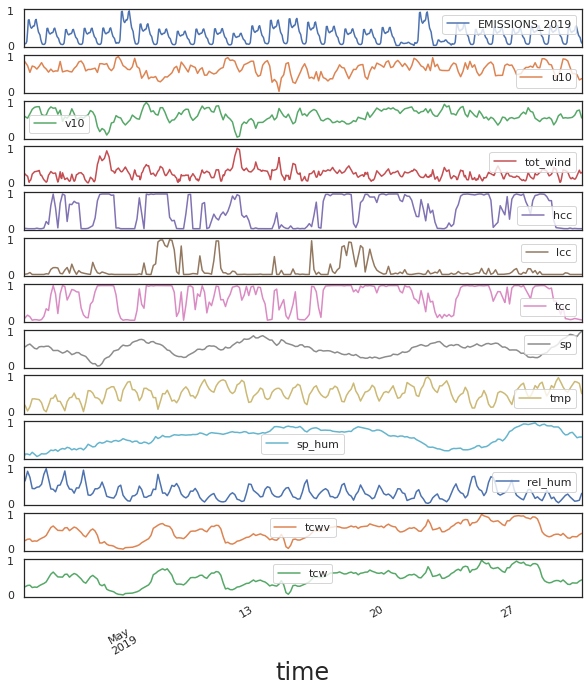

In [117]:
df_fix_norm.plot(subplots=True, figsize=(10,12), x='time');

#Split the dataset

In [118]:
df_fix_norm_1 = df_fix_norm[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc']]
df_fix_norm_2 = df_fix_norm[['time','EMISSIONS_2019','sp','tmp','sp_hum','rel_hum','tcwv','tcw']]

In [138]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    

df_fix_norm_1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

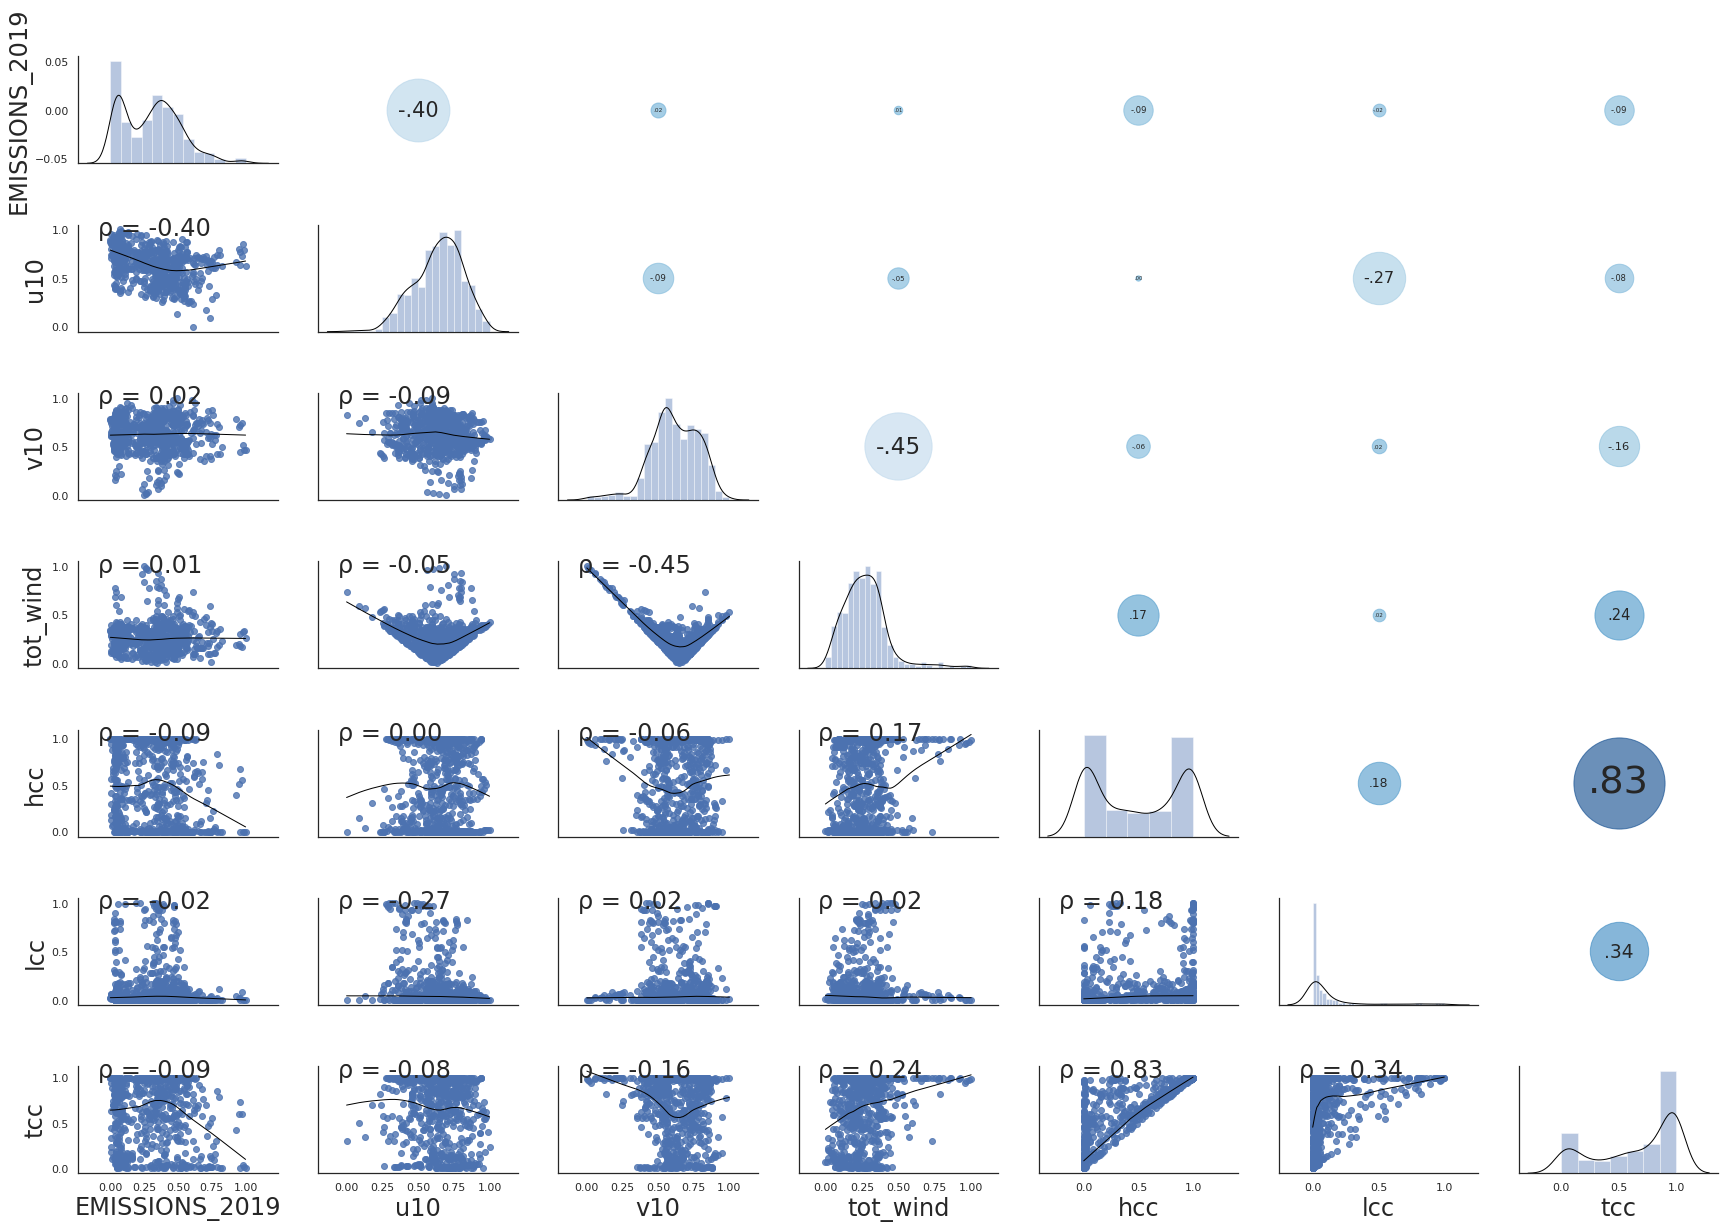

In [139]:
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_fix_norm_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [136]:
df_fix_change_1=df_fix_norm_1.set_index('time')
df_fix_change_1 = df_fix_change_1.pct_change()
df_fix_change_1=df_fix_change_1.replace(np.nan, 0)
df_fix_change_1=df_fix_change_1.replace(np.inf, 1)
df_fix_change_1.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc
time,,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-01 02:00:00,-0.132173,-0.029278,-0.025225,-0.080063,1.000000,0.768016,0.974915
2019-05-01 03:00:00,-0.076151,-0.030161,-0.025878,-0.074626,0.500000,0.434394,0.493649
2019-05-01 04:00:00,0.247285,-0.039491,-0.022745,-0.098375,-0.333333,0.526680,0.289911
2019-05-01 05:00:00,0.859122,-0.041115,-0.023274,-0.084886,-0.500000,0.344984,0.224753


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

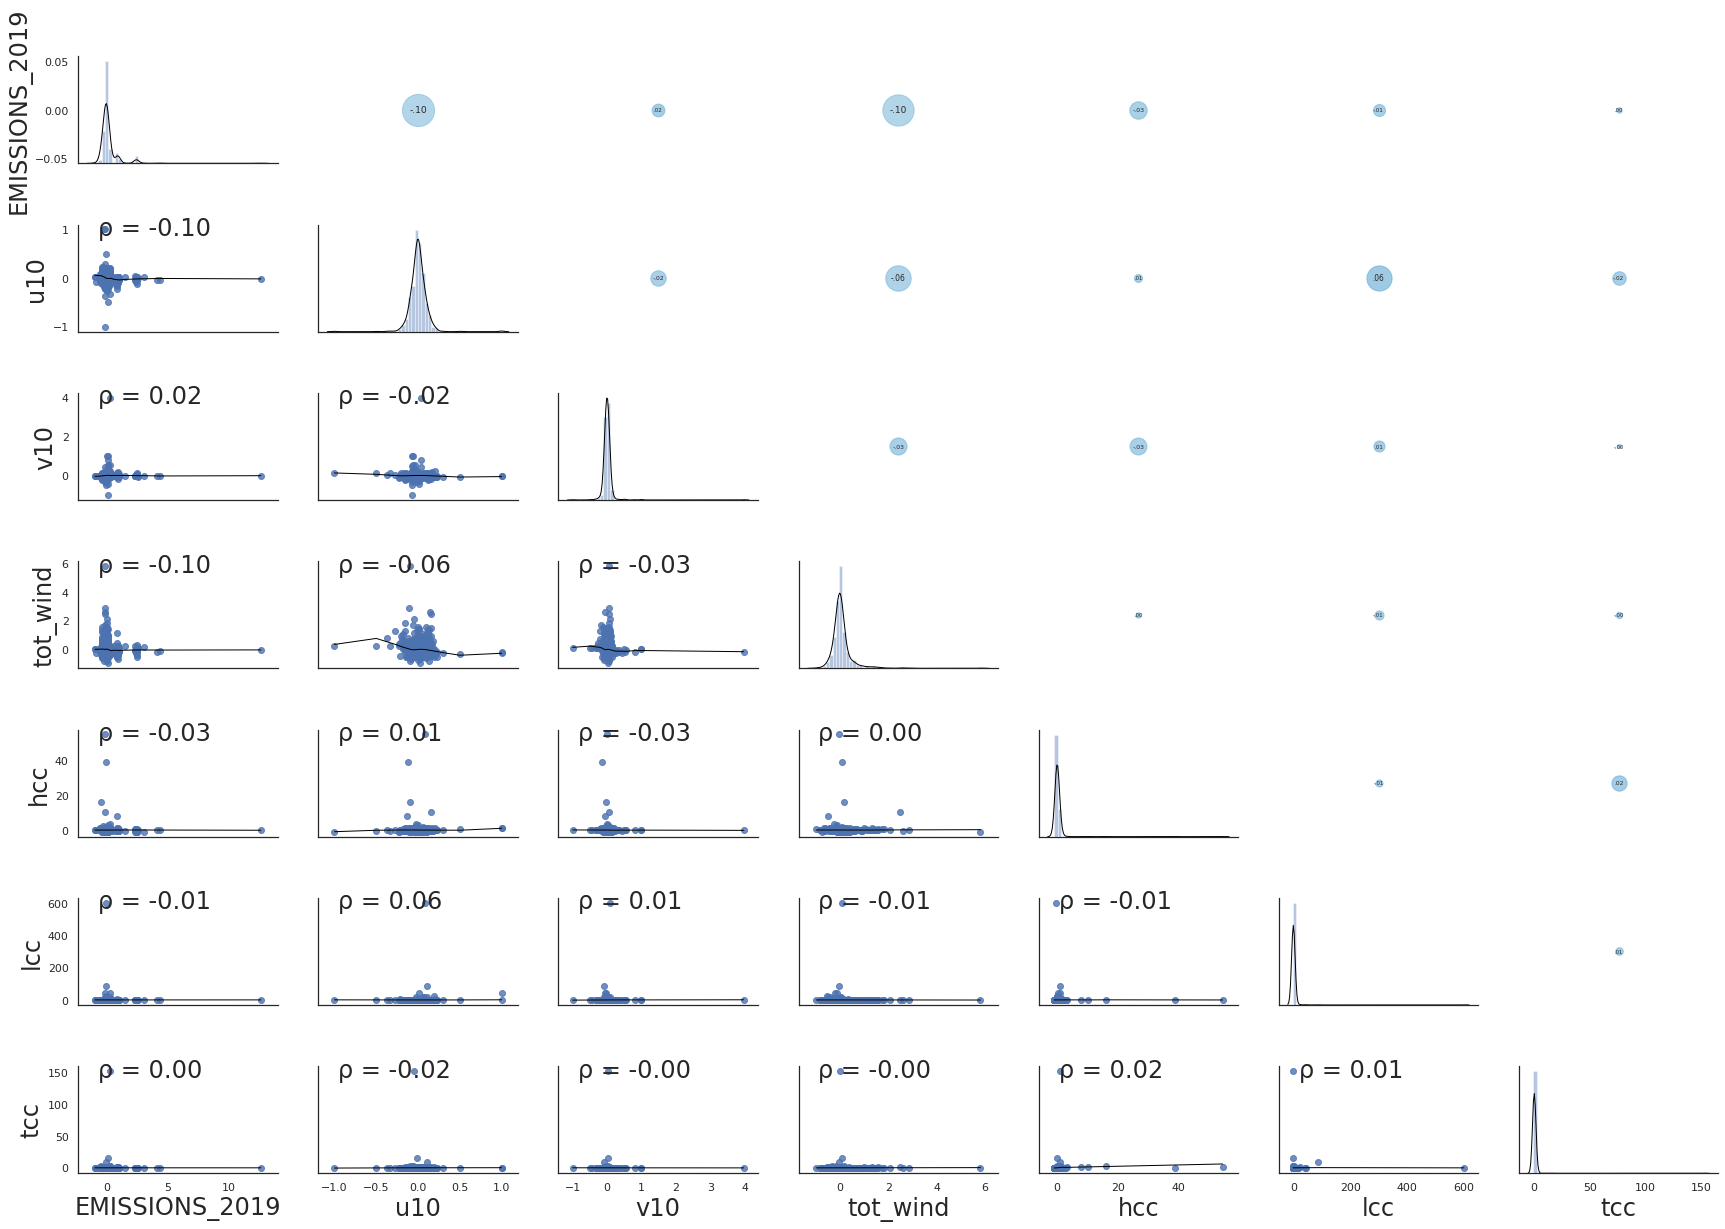

In [137]:
g = sns.PairGrid(df_fix_change_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

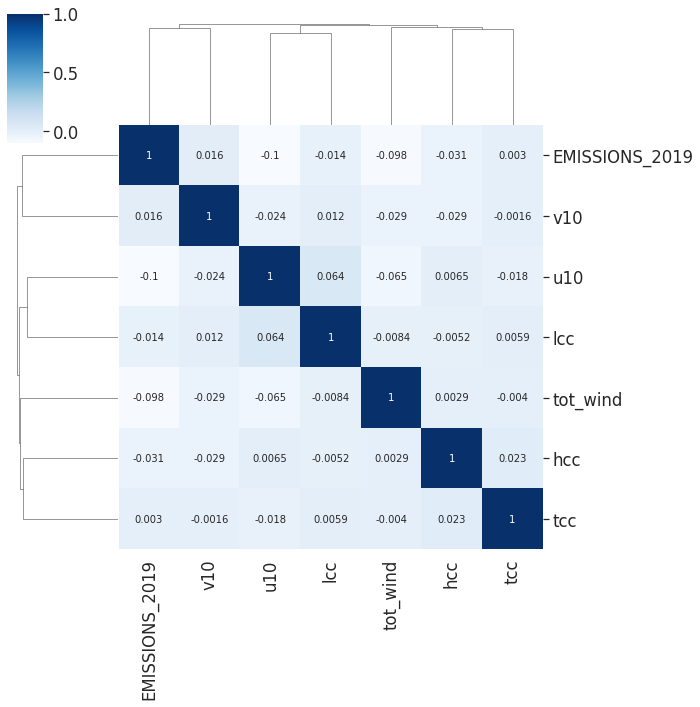

In [146]:
correlations=df_fix_change_1.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

df_fix_norm_2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

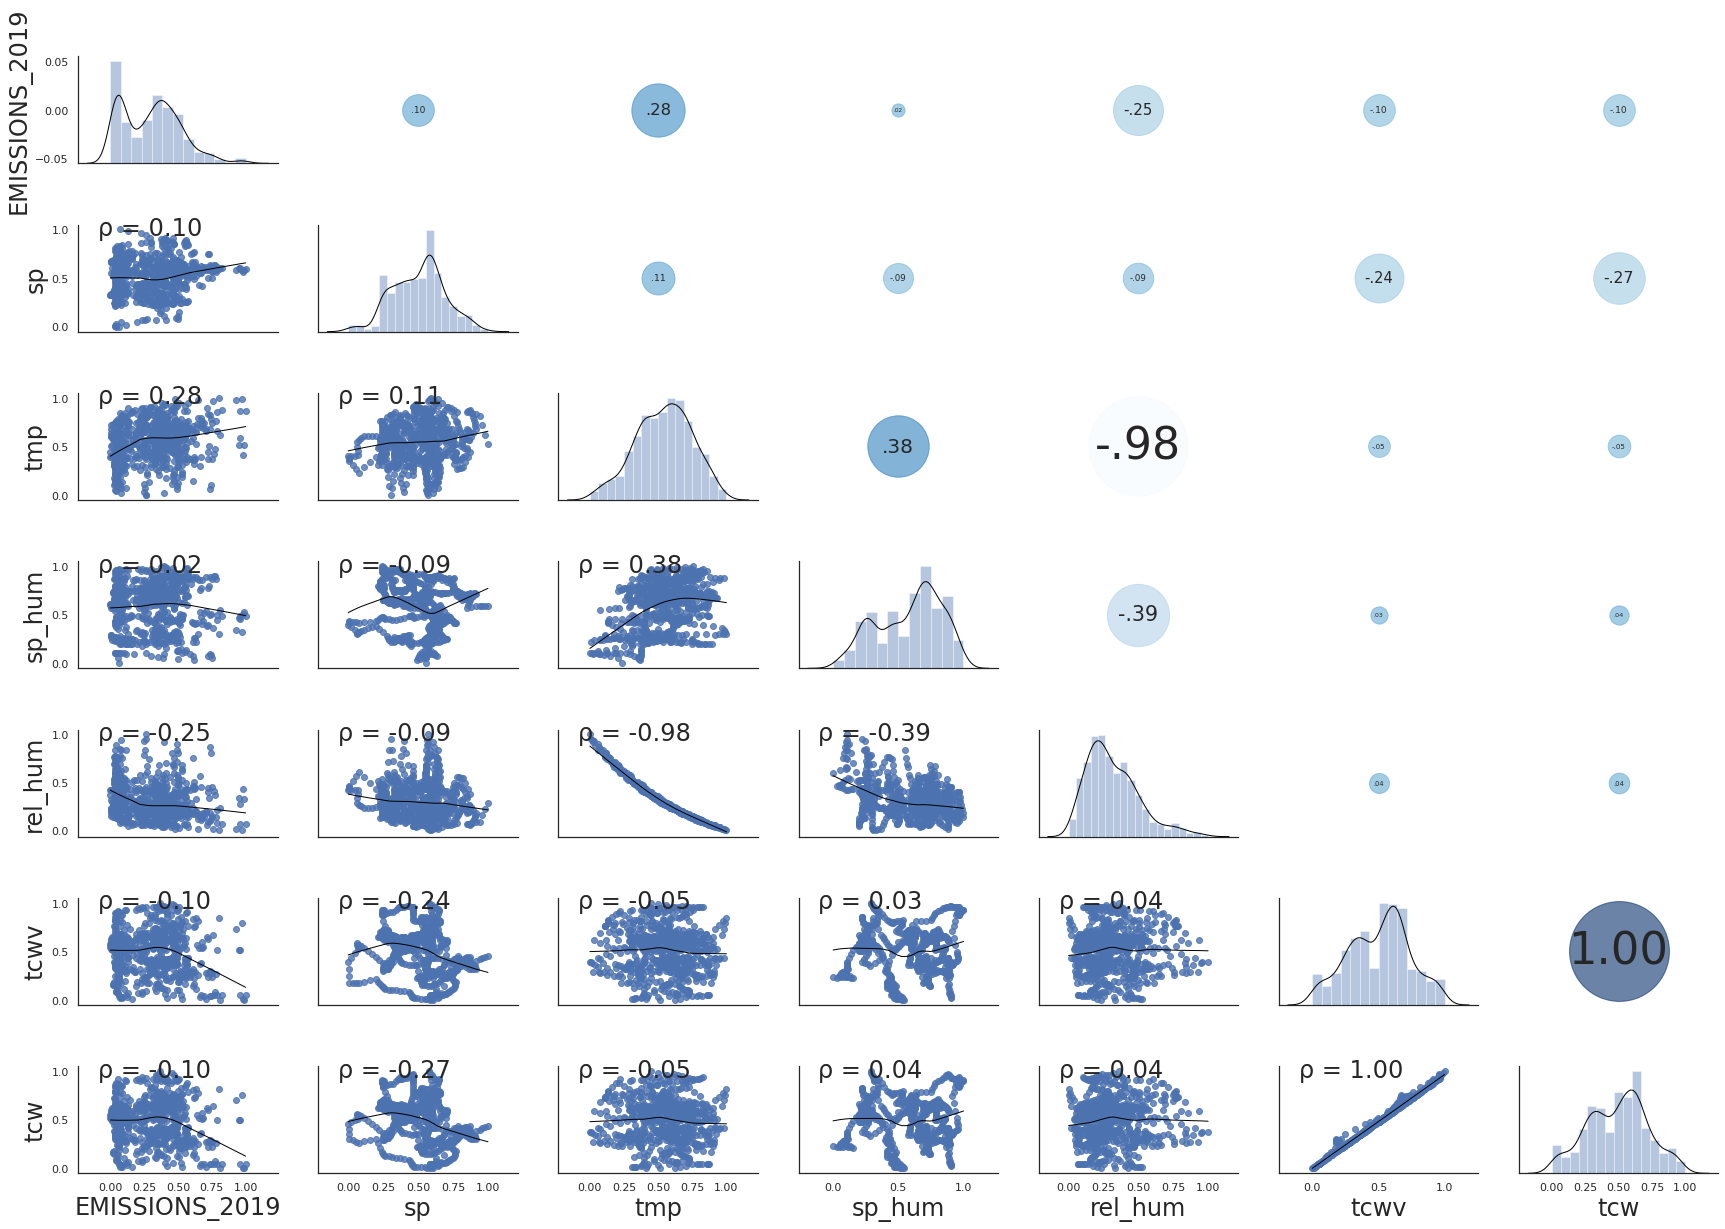

In [140]:
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_fix_norm_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [141]:
df_fix_change_2=df_fix_norm_2.set_index('time')
df_fix_change_2 = df_fix_change_2.pct_change()
df_fix_change_2=df_fix_change_2.replace(np.nan, 0)
df_fix_change_2=df_fix_change_2.replace(np.inf, 1)
df_fix_change_2.head()

,EMISSIONS_2019,sp,tmp,sp_hum,rel_hum,tcwv,tcw
time,,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-01 02:00:00,-0.132173,-0.003252,-0.123918,1.000000,0.058736,0.028983,0.029219
2019-05-01 03:00:00,-0.076151,-0.003249,-0.141436,0.999851,0.055477,0.028166,0.028390
2019-05-01 04:00:00,0.247285,0.030709,-0.287873,-0.002269,0.130725,0.047442,0.048348
2019-05-01 05:00:00,0.859122,0.029801,-0.404213,-0.002311,0.115612,0.045293,0.046118


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

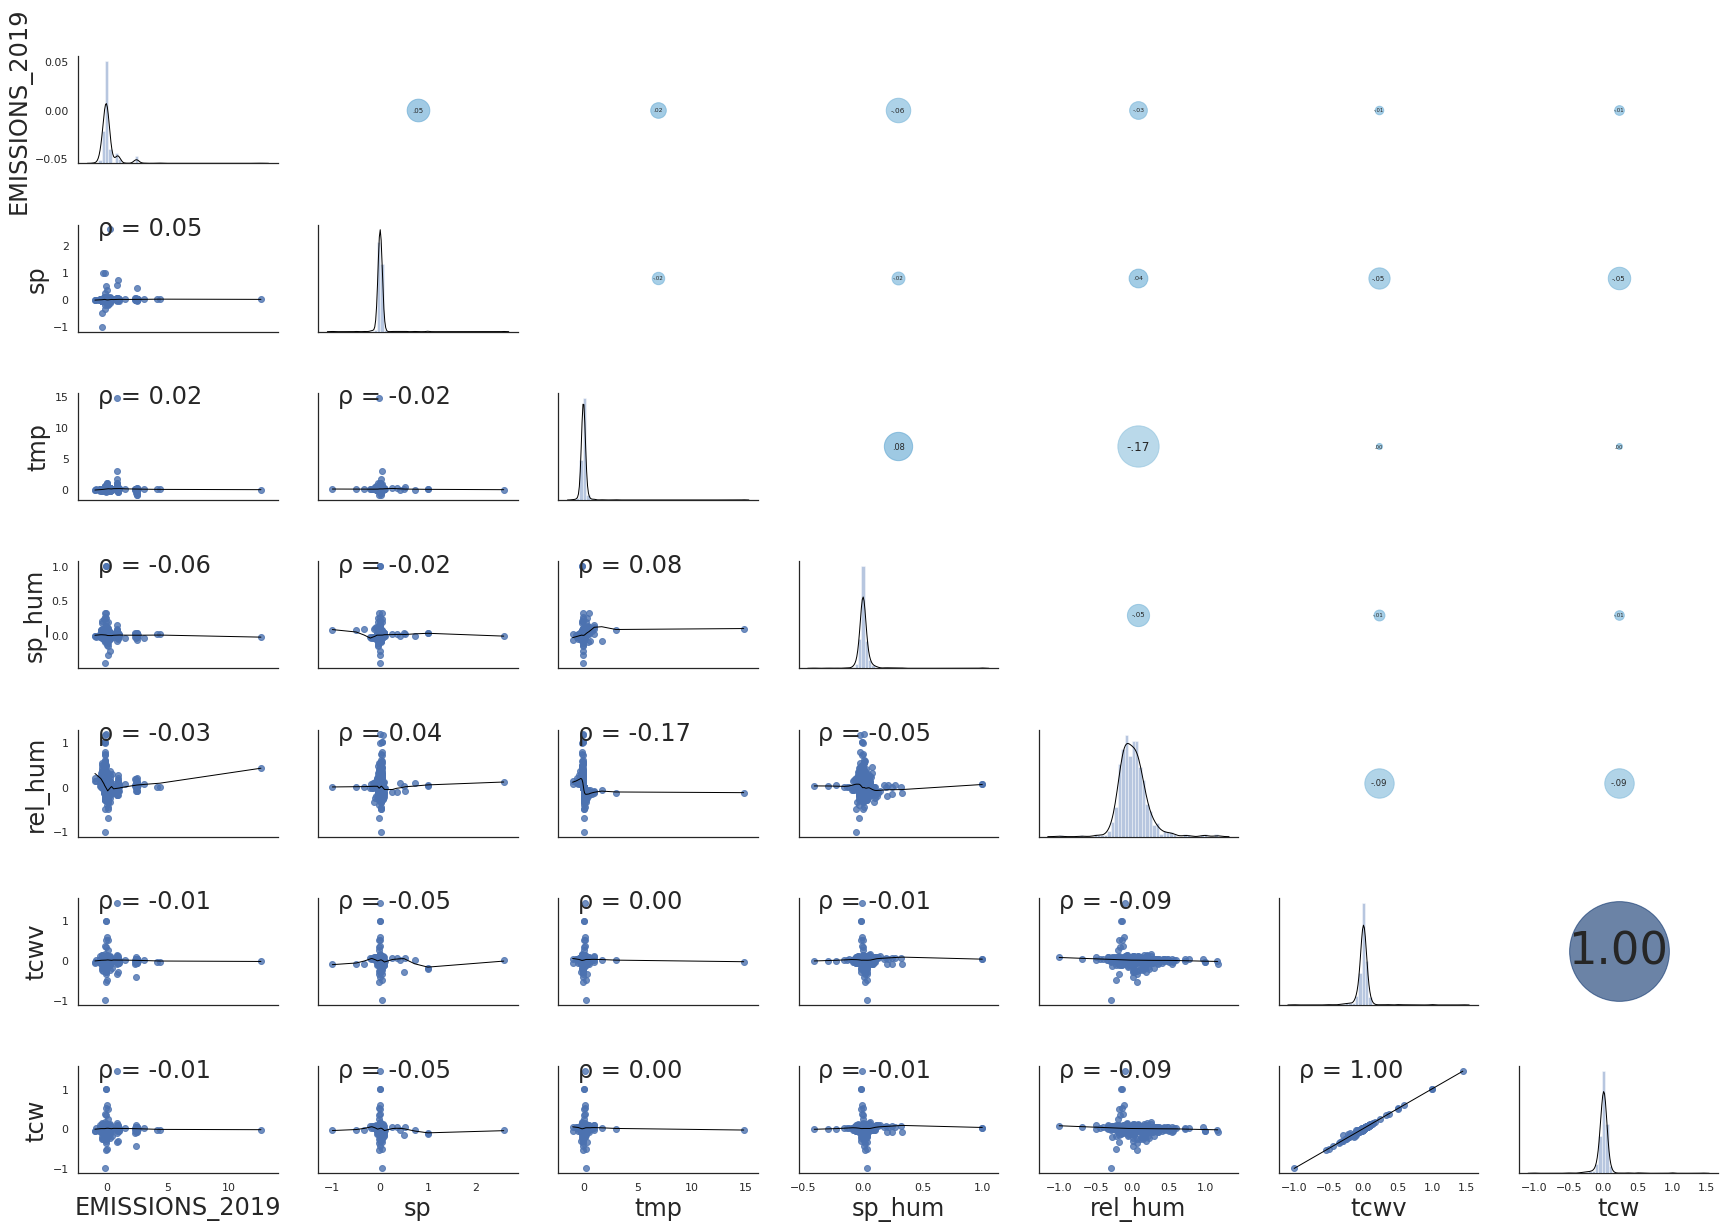

In [142]:
g = sns.PairGrid(df_fix_change_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

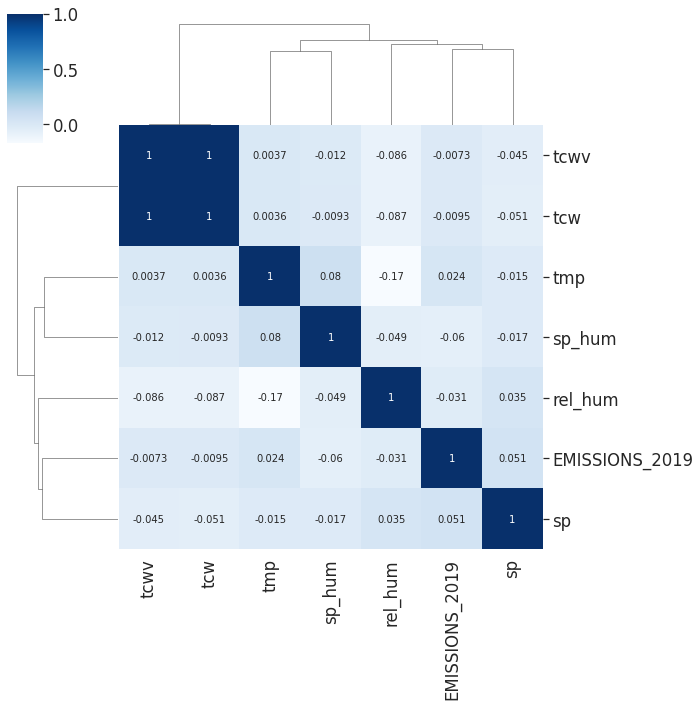

In [147]:
correlations=df_fix_change_2.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

#Shift time